In [2]:
import pandas as pd

In [3]:
invoice = pd.read_csv('fct_invoice.csv')
invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
#Easy number 1

invoice['customer_id'].nunique()

5191

In [5]:
#Easy number 2

unique_categories = invoice['category'].unique()

print(unique_categories)
print(invoice['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [6]:
#Easy number 3

invoice.groupby(['payment_method'])['payment_method'].count().nlargest(1)

payment_method
Cash    44447
Name: payment_method, dtype: int64

In [7]:
#Medium number 1

invoice['sale_value']= invoice['quantity'] * invoice['price']

invoice.groupby(['payment_method'])['sale_value'].sum().nlargest(3)

payment_method
Cash           1.128322e+08
Credit Card    8.807712e+07
Debit Card     5.059643e+07
Name: sale_value, dtype: float64

In [8]:
#Medium number 2

customers = pd.read_json('dim_customer.json')

merged = invoice.merge(customers, left_on='customer_id', right_on='id')

over_45 = merged[merged['age']>45]

over_45['sale_value'].sum()

82039768.15

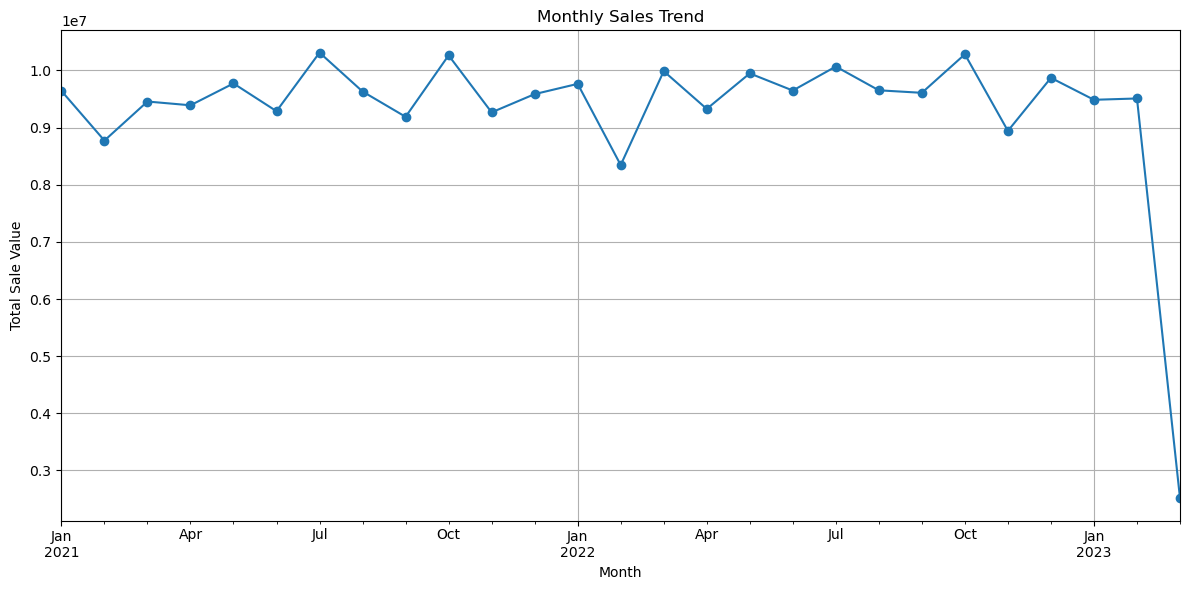

In [9]:
#Medium number 3

import matplotlib.pyplot as plt
import pandas as pd


merged['month'] = pd.to_datetime(merged['invoice_date'], format='%d/%m/%Y').dt.to_period('M')
monthly_sales = merged.groupby('month')['sale_value'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sale Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd


pivot_table = merged.pivot_table(
    values='sale_value',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0,
    observed=False  
)


pivot = pivot.round(2)

print(pivot)

age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59        60-69       70-79  
category                                               
Books               74962.20     80476.80    54827.85  
Clothing         10321851.76  10660642.08  7769371.28  
Cosmetics          587780.96    649990.76   419082.62  
Food & Beverage    